# IMPORT ALL LIBRARIES NEEDED

In [124]:
import pandas as pd #### Library for working with large datsets
import numpy as np #### Library for performing numerical calculations
import matplotlib.pyplot as plt #### Baasic Library for plotting graphs
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 12) ### Setting the size of the Plots
import datetime as dt
from math import radians, cos, sin, asin, sqrt
from sklearn.preprocessing import MinMaxScaler
#from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams['figure.figsize']=20,5

# LOAD THE DATA

In [125]:
ds = pd.read_csv('/content/BTC-USD Training Data - 1st Jan 2016 to 1st Jan 2022.csv')

# Exploratory Data Analysis

In [126]:
ds.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [127]:
ds.shape[0]

2193

In [128]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [129]:
ds.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,13005.792871,13362.996536,12616.080147,13025.164563,13025.164563,1.757591e+10
std,16479.996404,16935.236723,15960.649705,16489.530523,16489.530523,2.085247e+10
min,365.072998,374.950012,354.914001,364.330994,364.330994,2.851400e+07
25%,2577.770020,2682.260010,2510.479980,2589.409912,2589.409912,1.182870e+09
50%,7397.134277,7535.716797,7233.399414,7397.796875,7397.796875,9.175292e+09
75%,11354.299805,11570.786133,11018.129883,11358.662109,11358.662109,2.886756e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [130]:
ds.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [131]:
ds = ds[['Date','Close']]

In [132]:
ds

,Date,Close
0,2016-01-01,434.334015
1,2016-01-02,433.437988
2,2016-01-03,430.010986
3,2016-01-04,433.091003
4,2016-01-05,431.959991
...,...,...
2188,2021-12-28,47588.855469
2189,2021-12-29,46444.710938
2190,2021-12-30,47178.125000
2191,2021-12-31,46306.445313


In [133]:
ds.columns = ['ds','y']

In [134]:
ds.head()

,ds,y
0,2016-01-01,434.334015
1,2016-01-02,433.437988
2,2016-01-03,430.010986
3,2016-01-04,433.091003
4,2016-01-05,431.959991


# Checking rows with missing values

In [135]:
ds.isnull().sum()

ds    0
y     0
dtype: int64

# Visualize 

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams['figure.figsize']=20,5

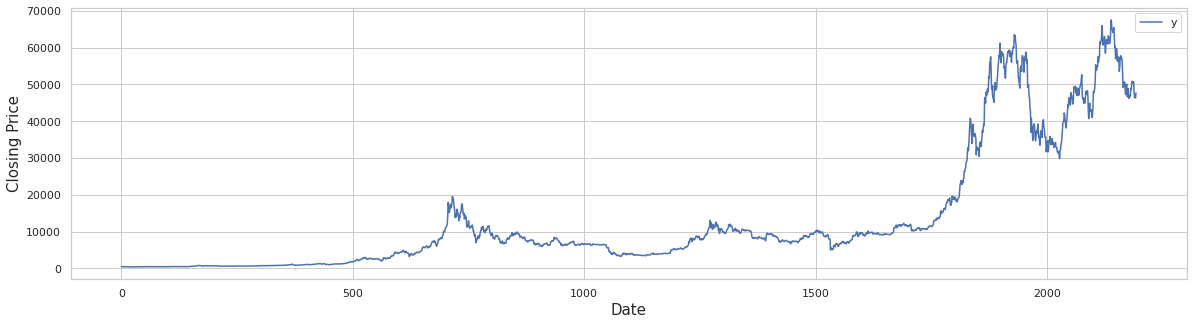

In [137]:
plt.grid(True)
plt.xlabel('Date',size=15)
plt.ylabel('Closing Price',size=15)
plt.plot(ds['y'],label='y')
plt.legend(loc='best')
plt.show()

# Stationarity in Time Series

In [138]:
#rolling average transformation with window 20
rollingseries=ds.rolling(window=100)
rollingmean=rollingseries.mean()
rollingstd=rollingseries.std()
rollingmean['y'].head(30)
rollingstd['y'].head(30)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
Name: y, dtype: float64

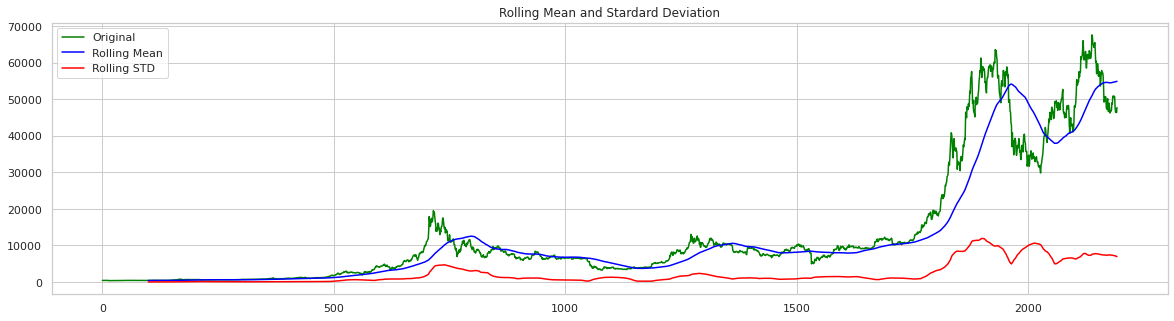

In [139]:
plt.plot(ds['y'],color='green',label='Original')
plt.plot(rollingmean['y'],color='blue',label='Rolling Mean')
plt.plot(rollingstd['y'],color='red',label='Rolling STD')
plt.legend(loc='best')
plt.title('Rolling Mean and Stardard Deviation')
plt.show(block=False)

As the rolling mean and rolling standard deviation are not constant over time, we can conclude that the data is not stationary. 

In [140]:
data=ds['y'][:50]
fit1=SimpleExpSmoothing(data).fit(smoothing_level=0.2)
fit2=SimpleExpSmoothing(data).fit(smoothing_level=0.8)

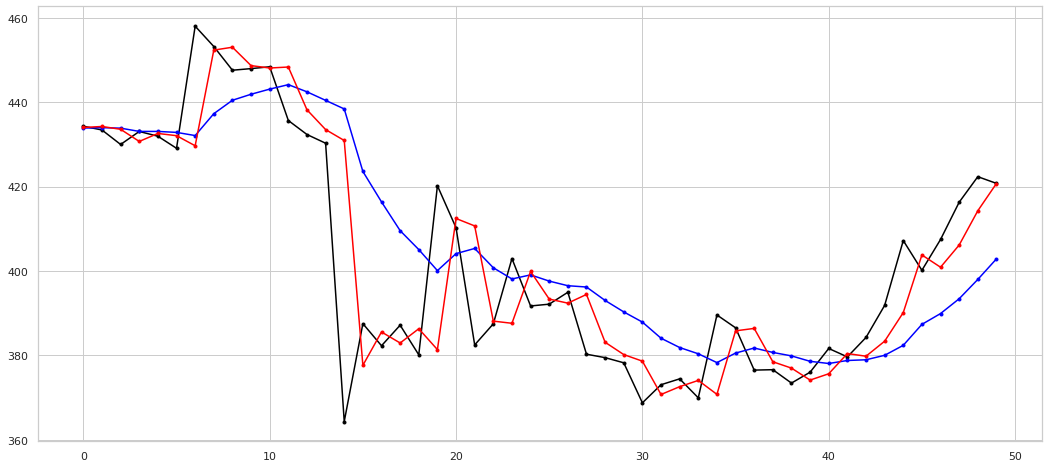

In [141]:
plt.figure(figsize=(18,8))
plt.plot(ds['y'][:50],marker='.',color='black')
plt.plot(fit1.fittedvalues,marker='.',color='blue')
plt.plot(fit2.fittedvalues,marker='.',color='red')

In [142]:
fit1=Holt(data).fit()
fit2=Holt(data,exponential=True).fit() 

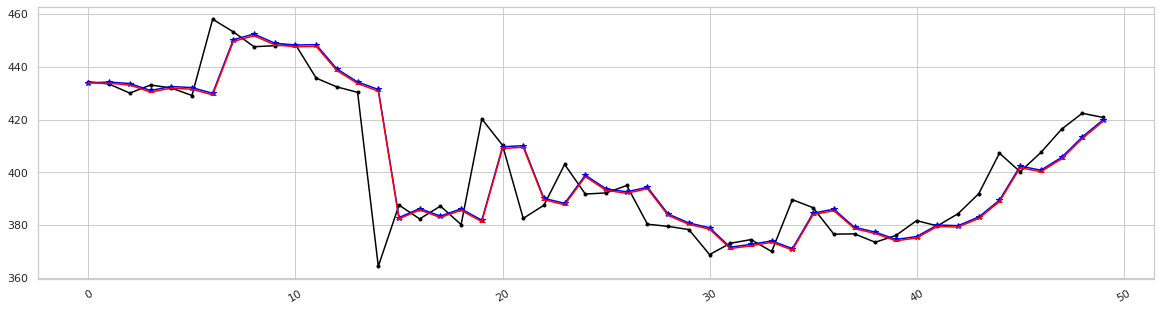

In [143]:
plt.plot(data,marker='.',color='black')
plt.xticks(rotation=30)
plt.plot(fit1.fittedvalues,marker='*',color='blue')
plt.plot(fit2.fittedvalues,marker='_',color='red')

Exponential plot(red) is exactly on the Linear Plot(Blue), hence we can say that the data has a linear trend, not exponential trend.

In [144]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd

In [145]:
ds.head()

,ds,y
0,2016-01-01,434.334015
1,2016-01-02,433.437988
2,2016-01-03,430.010986
3,2016-01-04,433.091003
4,2016-01-05,431.959991


# ADFULLER TEST FOR STATIONARITY

In [146]:
from statsmodels.tsa.stattools import adfuller

In [147]:
#ADF Test - nul hypothesis - non-stationary - if p-value <5% reject null hypothesis
adfuller_result=adfuller(ds.y.values,autolag='AIC')
# adfuller_result

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'P-value: {adfuller_result[1]}')

for key,value in adfuller_result[4].items():
    print('Critical Values:')
    print(f'  {key}, {value}')

ADF Statistic: -0.5432579007246372
P-value: 0.8832950321778041
Critical Values:
  1%, -3.433369861402103
Critical Values:
  5%, -2.8628740689440835
Critical Values:
  10%, -2.5674801917270327


We can see the P-Value is not <5%, hence we can say that the time series is non-stationary. Due to which we cannot use this time series data for machine learning, without making it stationary.

# Auto regression using ACF and PACF

In [148]:
import matplotlib
matplotlib.rc('xtick',labelsize=30)
matplotlib.rc('ytick',labelsize=30)
###########################################
import seaborn as sns
sns.set(style='whitegrid',color_codes=True)
from statsmodels.tsa.stattools import acf,pacf

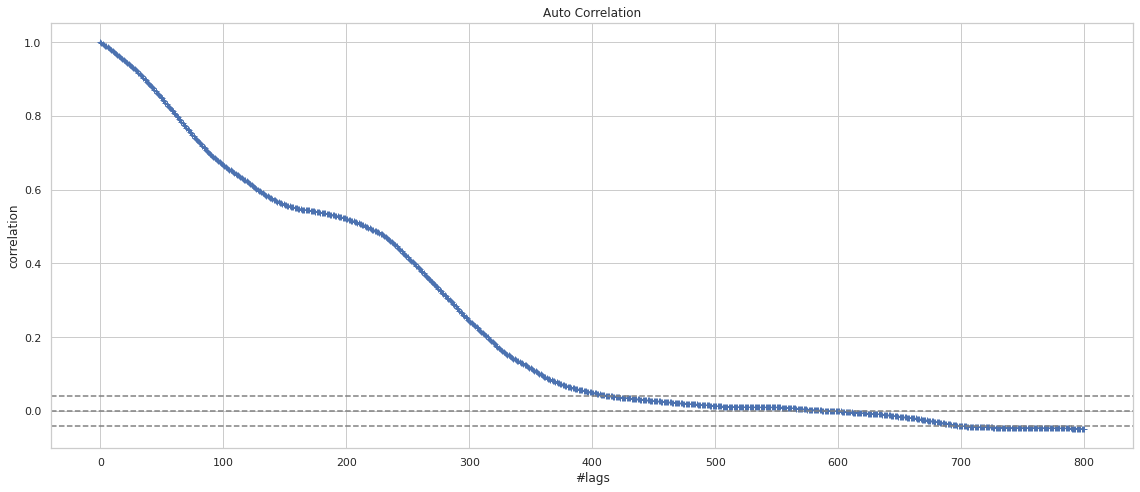

In [149]:
#Calling AutoCorrelationFunction with a lag of 200
y=ds['y']
ACF_lag=acf(ds['y'],nlags=800)
###########################################################
plt.figure(figsize=(16,7))
plt.plot(ACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Auto Correlation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()

From the above graph we can see that there is a descent amount of correlation till 600-650 lags.That means the time series is related to previous 650 observations or this time series can be regressed on previous 650 observations.But, if we consider the previous 650 observations, there will be multicolinearaity problem. Because,at time T, if the time series can be explained by T-1, at time T-1 also, the time series can be explained by T-2.

So,we dont want to have a very large no. of lags to be considered, we want to limit this lags, to avoid multicolinearity.

That can be addressed by PACF Chart.

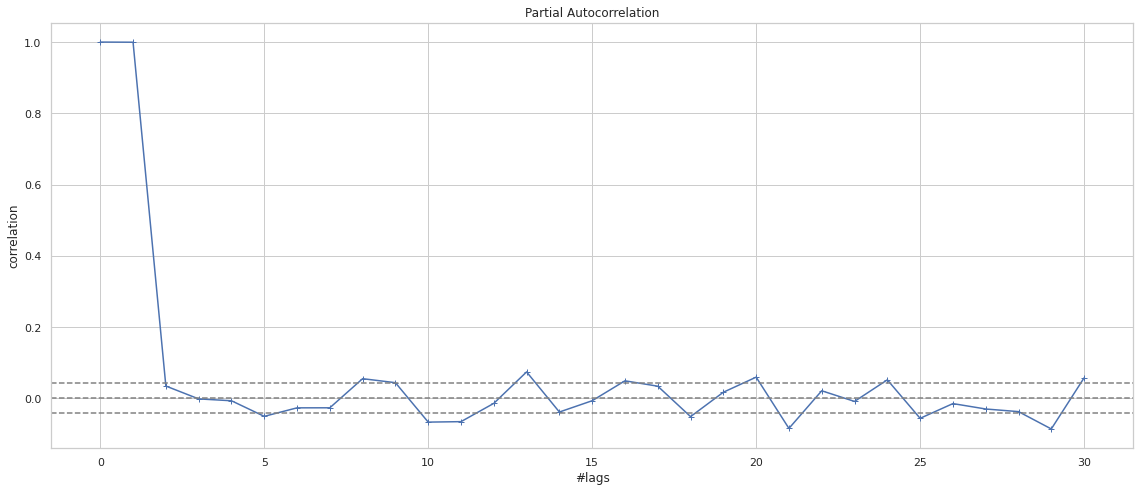

In [150]:
PACF_lag=pacf(y,nlags=30,method='ols')

plt.figure(figsize=(16,7))
plt.plot(PACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()

PACF chart shows the actual lags which impacts the time series after removing the noise.

So, from the chart we can see there is a significant amount of correlation upto value 2-2.3, hence our auto regression model should be of window 2.3, i.e. take the lag of the time series upto 2.3 lags and use the time series to predict the next value

# fbprophet 

In [151]:
!pip install Prophet

In [152]:
from prophet import Prophet

In [153]:
model = Prophet()

In [154]:
len(ds)

2193

In [155]:
model.fit(ds)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [156]:
future = model.make_future_dataframe(periods=24,freq='B')

In [157]:
future.tail()

,ds
2212,2022-01-28
2213,2022-01-31
2214,2022-02-01
2215,2022-02-02
2216,2022-02-03


In [158]:
prediction = model.predict(future)

In [159]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,-1210.456902,-7287.548162,5605.457317,-1210.456902,-1210.456902,318.126601,318.126601,318.126601,-7.746827,-7.746827,-7.746827,325.873428,325.873428,325.873428,0.0,0.0,0.0,-892.330300
1,2016-01-02,-1204.324964,-7184.720186,5404.989769,-1204.324964,-1204.324964,583.545087,583.545087,583.545087,4.403765,4.403765,4.403765,579.141322,579.141322,579.141322,0.0,0.0,0.0,-620.779877
2,2016-01-03,-1198.193025,-6779.974827,5539.060133,-1198.193025,-1198.193025,851.819684,851.819684,851.819684,30.487567,30.487567,30.487567,821.332117,821.332117,821.332117,0.0,0.0,0.0,-346.373341
3,2016-01-04,-1192.061087,-6088.258816,6586.819624,-1192.061087,-1192.061087,1077.670026,1077.670026,1077.670026,28.359026,28.359026,28.359026,1049.311000,1049.311000,1049.311000,0.0,0.0,0.0,-114.391061
4,2016-01-05,-1185.929149,-6462.649017,6290.484890,-1185.929149,-1185.929149,1233.077200,1233.077200,1233.077200,-27.124664,-27.124664,-27.124664,1260.201864,1260.201864,1260.201864,0.0,0.0,0.0,47.148052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,2022-01-28,64745.299705,59369.247429,72508.970854,64723.789103,64778.123412,1012.799725,1012.799725,1012.799725,-7.746827,-7.746827,-7.746827,1020.546552,1020.546552,1020.546552,0.0,0.0,0.0,65758.099430
2213,2022-01-31,65025.133413,60057.786997,72879.036678,64990.780249,65065.448803,1067.822693,1067.822693,1067.822693,28.359026,28.359026,28.359026,1039.463667,1039.463667,1039.463667,0.0,0.0,0.0,66092.956106
2214,2022-02-01,65118.411315,59782.681919,72692.996074,65081.489842,65160.417351,1061.306436,1061.306436,1061.306436,-27.124664,-27.124664,-27.124664,1088.431100,1088.431100,1088.431100,0.0,0.0,0.0,66179.717752
2215,2022-02-02,65211.689218,60539.429068,72728.275132,65172.037231,65258.426056,1167.577128,1167.577128,1167.577128,8.942805,8.942805,8.942805,1158.634323,1158.634323,1158.634323,0.0,0.0,0.0,66379.266346


In [160]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2212,2022-01-28,64745.299705,59369.247429,72508.970854,64723.789103,64778.123412,1012.799725,1012.799725,1012.799725,-7.746827,-7.746827,-7.746827,1020.546552,1020.546552,1020.546552,0.0,0.0,0.0,65758.099430
2213,2022-01-31,65025.133413,60057.786997,72879.036678,64990.780249,65065.448803,1067.822693,1067.822693,1067.822693,28.359026,28.359026,28.359026,1039.463667,1039.463667,1039.463667,0.0,0.0,0.0,66092.956106
2214,2022-02-01,65118.411315,59782.681919,72692.996074,65081.489842,65160.417351,1061.306436,1061.306436,1061.306436,-27.124664,-27.124664,-27.124664,1088.431100,1088.431100,1088.431100,0.0,0.0,0.0,66179.717752
2215,2022-02-02,65211.689218,60539.429068,72728.275132,65172.037231,65258.426056,1167.577128,1167.577128,1167.577128,8.942805,8.942805,8.942805,1158.634323,1158.634323,1158.634323,0.0,0.0,0.0,66379.266346
2216,2022-02-03,65304.967121,59875.267439,72279.807897,65262.932952,65355.911069,1211.964550,1211.964550,1211.964550,-37.321672,-37.321672,-37.321672,1249.286222,1249.286222,1249.286222,0.0,0.0,0.0,66516.931671


In [161]:
predicted_output = prediction[['ds','yhat_lower', 'yhat_upper','yhat']]

In [162]:
predicted_output

,ds,yhat_lower,yhat_upper,yhat
0,2016-01-01,-7287.548162,5605.457317,-892.330300
1,2016-01-02,-7184.720186,5404.989769,-620.779877
2,2016-01-03,-6779.974827,5539.060133,-346.373341
3,2016-01-04,-6088.258816,6586.819624,-114.391061
4,2016-01-05,-6462.649017,6290.484890,47.148052
...,...,...,...,...
2212,2022-01-28,59369.247429,72508.970854,65758.099430
2213,2022-01-31,60057.786997,72879.036678,66092.956106
2214,2022-02-01,59782.681919,72692.996074,66179.717752
2215,2022-02-02,60539.429068,72728.275132,66379.266346


In [163]:
ds


,ds,y
0,2016-01-01,434.334015
1,2016-01-02,433.437988
2,2016-01-03,430.010986
3,2016-01-04,433.091003
4,2016-01-05,431.959991
...,...,...
2188,2021-12-28,47588.855469
2189,2021-12-29,46444.710938
2190,2021-12-30,47178.125000
2191,2021-12-31,46306.445313


In [164]:
predicted_output

,ds,yhat_lower,yhat_upper,yhat
0,2016-01-01,-7287.548162,5605.457317,-892.330300
1,2016-01-02,-7184.720186,5404.989769,-620.779877
2,2016-01-03,-6779.974827,5539.060133,-346.373341
3,2016-01-04,-6088.258816,6586.819624,-114.391061
4,2016-01-05,-6462.649017,6290.484890,47.148052
...,...,...,...,...
2212,2022-01-28,59369.247429,72508.970854,65758.099430
2213,2022-01-31,60057.786997,72879.036678,66092.956106
2214,2022-02-01,59782.681919,72692.996074,66179.717752
2215,2022-02-02,60539.429068,72728.275132,66379.266346


In [165]:
len(predicted_output)

2217

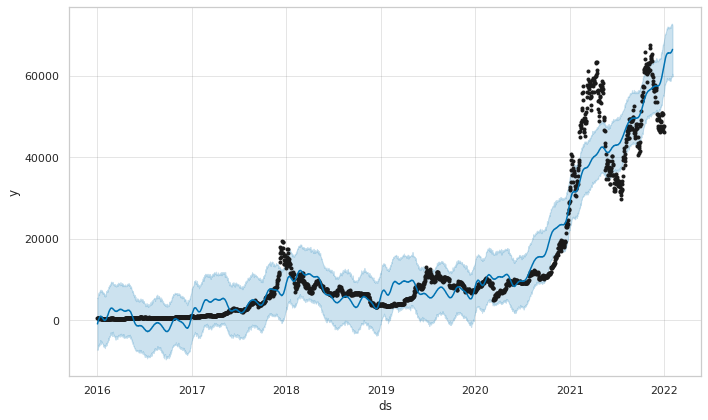

In [166]:
model.plot(predicted_output);

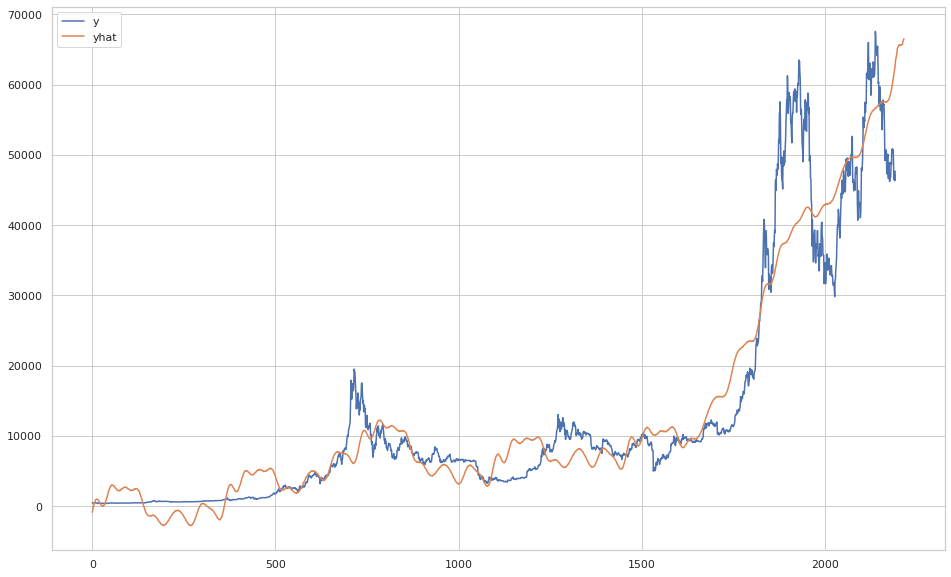

In [167]:
plt.figure(figsize=(16,10))
ds['y'].plot()
prediction['yhat'].plot()
plt.legend()

In [168]:
test_ds = pd.read_csv('/content/BTC-USD Out of Time Testing 1st Jan 2022 to 4th Feb 2022.csv')

In [169]:
test_ds

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
1,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
3,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
4,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
5,2022-01-06,43565.511719,43748.718750,42645.539063,43160.929688,43160.929688,30208048289
6,2022-01-07,43153.570313,43153.570313,41077.445313,41557.902344,41557.902344,84196607520
7,2022-01-08,41561.464844,42228.941406,40672.277344,41733.941406,41733.941406,28066355845
8,2022-01-09,41734.726563,42663.949219,41338.160156,41911.601563,41911.601563,21294384372
9,2022-01-10,41910.230469,42199.484375,39796.570313,41821.261719,41821.261719,32104232331


In [170]:
test_ds.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [171]:
test_ds = test_ds[['Date','Close']]

In [172]:
test_ds

,Date,Close
0,2022-01-01,47686.812500
1,2022-01-02,47345.218750
2,2022-01-03,46458.117188
3,2022-01-04,45897.574219
4,2022-01-05,43569.003906
5,2022-01-06,43160.929688
6,2022-01-07,41557.902344
7,2022-01-08,41733.941406
8,2022-01-09,41911.601563
9,2022-01-10,41821.261719


In [173]:
test_ds['Date'] = pd.to_datetime(test_ds['Date'])

In [174]:
test_ds

,Date,Close
0,2022-01-01,47686.812500
1,2022-01-02,47345.218750
2,2022-01-03,46458.117188
3,2022-01-04,45897.574219
4,2022-01-05,43569.003906
5,2022-01-06,43160.929688
6,2022-01-07,41557.902344
7,2022-01-08,41733.941406
8,2022-01-09,41911.601563
9,2022-01-10,41821.261719


In [175]:
predicted_output

,ds,yhat_lower,yhat_upper,yhat
0,2016-01-01,-7287.548162,5605.457317,-892.330300
1,2016-01-02,-7184.720186,5404.989769,-620.779877
2,2016-01-03,-6779.974827,5539.060133,-346.373341
3,2016-01-04,-6088.258816,6586.819624,-114.391061
4,2016-01-05,-6462.649017,6290.484890,47.148052
...,...,...,...,...
2212,2022-01-28,59369.247429,72508.970854,65758.099430
2213,2022-01-31,60057.786997,72879.036678,66092.956106
2214,2022-02-01,59782.681919,72692.996074,66179.717752
2215,2022-02-02,60539.429068,72728.275132,66379.266346


In [176]:
comparing_set = predicted_output

In [177]:
len(comparing_set)

2217

In [178]:
comparing_set.drop(labels=1498,axis=0,inplace=True)

In [179]:
len(test_ds)

35

In [180]:
comparing_set

,ds,yhat_lower,yhat_upper,yhat
0,2016-01-01,-7287.548162,5605.457317,-892.330300
1,2016-01-02,-7184.720186,5404.989769,-620.779877
2,2016-01-03,-6779.974827,5539.060133,-346.373341
3,2016-01-04,-6088.258816,6586.819624,-114.391061
4,2016-01-05,-6462.649017,6290.484890,47.148052
...,...,...,...,...
2212,2022-01-28,59369.247429,72508.970854,65758.099430
2213,2022-01-31,60057.786997,72879.036678,66092.956106
2214,2022-02-01,59782.681919,72692.996074,66179.717752
2215,2022-02-02,60539.429068,72728.275132,66379.266346


In [181]:
comparing_set.columns

Index(['ds', 'yhat_lower', 'yhat_upper', 'yhat'], dtype='object')

In [182]:
cm = comparing_set[['ds','yhat']]

In [183]:
cm

,ds,yhat
0,2016-01-01,-892.330300
1,2016-01-02,-620.779877
2,2016-01-03,-346.373341
3,2016-01-04,-114.391061
4,2016-01-05,47.148052
...,...,...
2212,2022-01-28,65758.099430
2213,2022-01-31,66092.956106
2214,2022-02-01,66179.717752
2215,2022-02-02,66379.266346


In [184]:
 #Evaluation Process 
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
print(sqrt(mean_squared_error(cm['yhat'],test_ds['Close'])))